# <u>TMDB Dataset</u>
  ### *An Initial Look: Exploratory Data Analysis and some key insights*
> Archie Porteous DA13

### <u>Contents</u> 
### **1.** Importing the dataset    
 * **1.1** Importing the csv from a local path into a Pandas DataFrame     
 * **1.2** Quick Look using `.describe()` & `.head()`      

### **2.** Data Cleaning  
 * **2.1** Refromatting the '*genre*', '*keywords*', etc.. columns  
 * **2.2** Checking for nulls
 * **2.3** Deduplicating Rows

### **3.** Exploratory Insights/Keypoints
 *  **3.1** Budget Efficiency (revenue/dollar)
 *  **3.2** What Catergories do Voters like?

### **4.** Single Observation Analyses
 * **4.1** 

<img src = "https://images.unsplash.com/photo-1542204165-65bf26472b9b?q=80&w=1374&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" width=400px height=300px />

# **1.** Importing the dataset

### **1.1** Importing the csv from a local path into a Pandas DataFrame

In [8]:
# Importing Required Libraries
import numpy as np  # maths
import seaborn as sns # visualisation
import matplotlib.pyplot as plt # visualisation
import pandas as pd # dataframes & data analysis
import re # RegEx

In [9]:
path = "TMDB_movies.csv"

df = pd.read_csv(path)

### **1.2** Quick Look using `.describe()` & `.head()`

In [11]:
df.shape

(4803, 20)

In [12]:
df.describe(include="all")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
count,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4800,4803.000000,4803,4803,4802,4.803000e+03,4801.000000,4803,4803,3959,4803,4803.000000,4803.000000
unique,NaN,1175,1691,NaN,4222,37,4801,4800,NaN,3697,469,3280,NaN,NaN,544,3,3944,4800,NaN,NaN
top,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,NaN,[],en,Out of the Blue,"In the 22nd century, a paraplegic Marine is di...",NaN,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,NaN,NaN,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,NaN,NaN
freq,NaN,370,4,NaN,412,4505,2,1,NaN,351,2977,10,NaN,NaN,3171,4795,3,2,NaN,NaN
mean,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,NaN,NaN,NaN,8.226064e+07,106.875859,NaN,NaN,NaN,NaN,6.092172,690.217989
std,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,NaN,NaN,NaN,1.628571e+08,22.611935,NaN,NaN,NaN,NaN,1.194612,1234.585891
min,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,NaN,NaN,NaN,0.000000e+00,94.000000,NaN,NaN,NaN,NaN,5.600000,54.000000
50%,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,NaN,NaN,NaN,1.917000e+07,103.000000,NaN,NaN,NaN,NaN,6.200000,235.000000
75%,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,NaN,NaN,NaN,9.291719e+07,118.000000,NaN,NaN,NaN,NaN,6.800000,737.000000


In [13]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# **2.** Data Cleaning 

### **2.1** Refromatting the '*genre*', '*keywords*', etc.. columns

In [16]:
df.spoken_languages[0]

'[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]'

In [17]:
def clean_str(string):
    return re.findall("\"name\":\s\"([^}{\"]+)\"",string)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_45789/1782625454.py:2: SyntaxWarning: invalid escape sequence '\s'
  return re.findall("\"name\":\s\"([^}{\"]+)\"",string)


In [18]:
clean_str('[{"id": 28, "name": "Action"},{"id": 60, "name": "Adventure"},{"name": "Ingenious Film Partners", "id": 289},{"iso_3166_1": "US", "name": "United States of America"},{"iso_639_1": "en", "name": "English"}]')

['Action',
 'Adventure',
 'Ingenious Film Partners',
 'United States of America',
 'English']

In [19]:
df_eda = df.copy()

In [20]:
for column in ['genres','keywords','production_companies','production_countries','spoken_languages']:
    df_eda[column] = df_eda[column].apply(clean_str)

In [21]:
df_eda.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Espa\u00f1ol]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[Fran\u00e7ais, English, Espa\u00f1ol, Italian...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124


### **2.2** Checking for nulls

In [23]:
# counting nulls
null_df = df_eda.isnull() # truth table
null_df.sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

### **2.3** Checking for Duplicates

In [25]:
unique_id = set(df_eda.id)
len(unique_id)

4803

# **3.** Exploratory Insights/Keypoints

## **3.1** Budget Efficiency (revenue/dollar)

### Top 10 Films by Budget

In [29]:
top_10_budget = df_eda.sort_values('budget',ascending=False)[['budget', 'title']].head(10)
top_10_budget

,budget,title
17,380000000,Pirates of the Caribbean: On Stranger Tides
1,300000000,Pirates of the Caribbean: At World's End
7,280000000,Avengers: Age of Ultron
10,270000000,Superman Returns
4,260000000,John Carter
6,260000000,Tangled
5,258000000,Spider-Man 3
13,255000000,The Lone Ranger
46,250000000,X-Men: Days of Future Past
22,250000000,The Hobbit: The Desolation of Smaug


/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_45789/3942363610.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title',


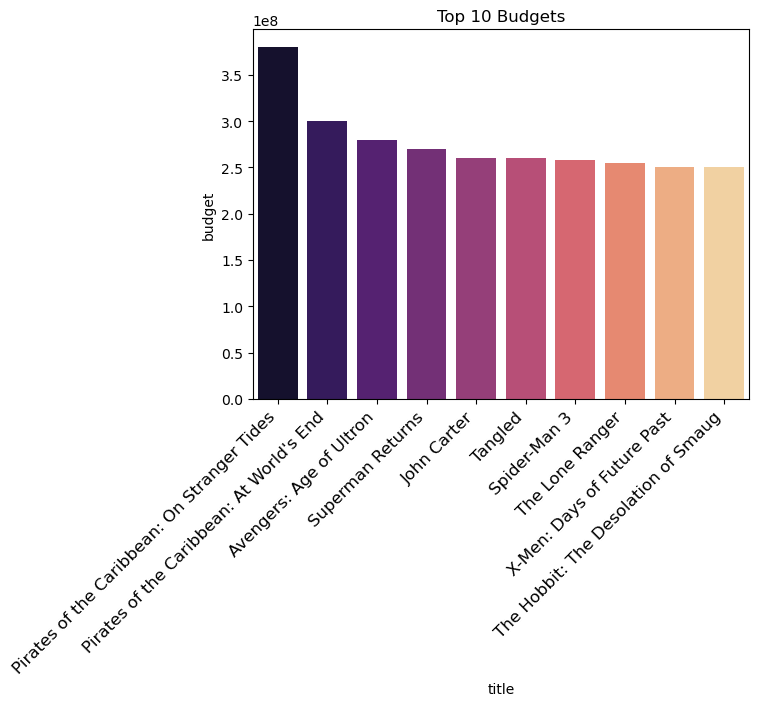

In [30]:
sns.barplot(x='title',
            y='budget',
            data=top_10_budget,
            palette = 'magma')


plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )

plt.title('Top 10 Budgets')

plt.show()

> ### Conclusion:
> *Pirates of the Caribbean: On Stranger Tides* is the film with the most expensive budget in our dataset. This is due to its many filming locations and extensive use of state-of-the-art visual effects

### Top 10 Films by Revenue

In [33]:
top_10_revenue = df_eda.sort_values('revenue',ascending=False)[['revenue', 'title']].head(10)
top_10_revenue

,revenue,title
0,2787965087,Avatar
25,1845034188,Titanic
16,1519557910,The Avengers
28,1513528810,Jurassic World
44,1506249360,Furious 7
7,1405403694,Avengers: Age of Ultron
124,1274219009,Frozen
31,1215439994,Iron Man 3
546,1156730962,Minions
26,1153304495,Captain America: Civil War


/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_45789/818369740.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title',


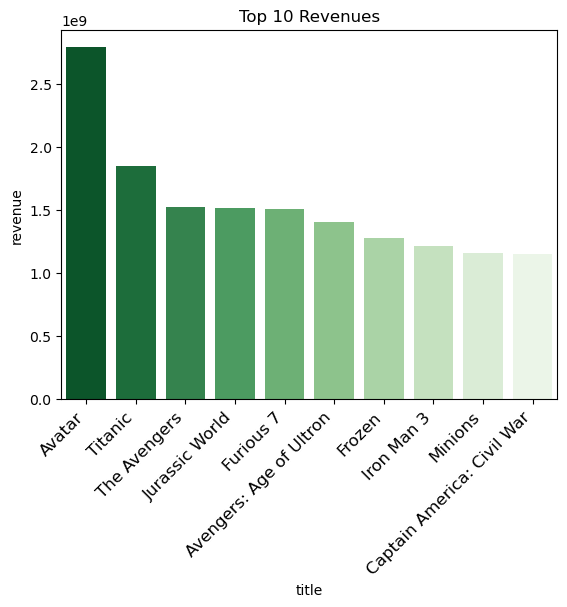

In [34]:
sns.barplot(x='title',
            y='revenue',
            data=top_10_revenue,
            palette = 'Greens_r')


plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )

plt.title('Top 10 Revenues')

plt.show()

> ### Conclusion:
> *Avatar* was the highest grossing film in our dataset. Avatar had a captivating story and amazing visuals.

### **Top 10 Films by Revenue per Dollar Budget**

In [37]:
print(df_eda[df_eda.budget==0].shape[0])
print(df_eda[df_eda.revenue==0].shape[0])

1037
1427


In [38]:
df_eda[df_eda.budget==0].index

Index([ 265,  321,  359,  406,  409,  453,  463,  474,  475,  489,
       ...
       4787, 4789, 4790, 4793, 4794, 4795, 4797, 4800, 4801, 4802],
      dtype='int64', length=1037)

In [39]:
df_zeros = df_eda.copy()
df_zeros.drop(index=df_zeros[df_eda.budget==0].index, inplace=True)
df_zeros.drop(index=df_zeros[df_eda.revenue==0].index, inplace=True)


/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_45789/1842020370.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_zeros.drop(index=df_zeros[df_eda.revenue==0].index, inplace=True)


In [40]:
df_zeros['rev_bud'] = df_zeros['revenue']/df_zeros['budget']
top_10_efficiency = df_zeros.sort_values('rev_bud',ascending=False)[['rev_bud', 'title']].head(10)
top_10_efficiency

,rev_bud,title
4238,8.500000e+06,Modern Times
3137,1.000000e+06,Nurse 3-D
4577,1.289039e+04,Paranormal Activity
4582,5.330339e+03,Tarnation
4496,4.133333e+03,The Blair Witch Project
4724,7.000000e+02,Eraserhead
4788,5.000000e+02,Pink Flamingos
4742,4.396166e+02,Super Size Me
4723,4.266441e+02,The Gallows
4514,4.205227e+02,Open Water


/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_45789/2448949670.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title',


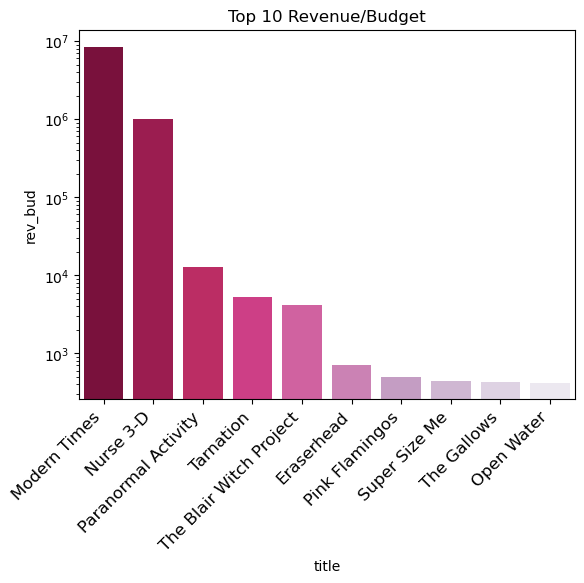

In [41]:
sns.barplot(x='title',
            y='rev_bud',
            data=top_10_efficiency,
            palette = 'PuRd_r')


plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )

plt.title('Top 10 Revenue/Budget')

plt.yscale('log')
plt.show()

> ### Conclusion:
> *Modern Times* was one of the American Film Institutes Top 100 Films in 1998 and was first shown in theatres in 1936. This longevity is a likely factor to its great success. But it is also worth taking into considereation that the dollars in the dataset are not said to be adjusted for inflation!
>
> 
> *Paranormal Activity* is another interesting example shown in the graph above. It had a budget of a mere $15000 and was shot over just 10 days. It had basic scenes with static camera angles and the script was only made of rough guidlines for the actors.

In [43]:
df_zeros[df_zeros['title']=="Paranormal Activity"]['budget']

4577    15000
Name: budget, dtype: int64

## **3.2** What Genres do voters like?

### What are the most popular Genres by average score per Genre?

**What is the max number of genres per film?**

In [71]:
genre_count = df_eda.genres.apply(lambda x:len(x))
print(genre_count)
print('Max number of Genres of a film:' , max(genre_count))

0       4
1       3
2       3
3       4
4       3
       ..
4798    3
4799    2
4800    4
4801    0
4802    1
Name: genres, Length: 4803, dtype: int64
Max number of Genres of a film: 7


**What genres are there?**

In [211]:
# We first create the new columns and fill them as empty

for genre in range(max(genre_count)+1):
    df_eda[f'genre_{genre}'] = np.nan
    
# We then go though every row/film looking at each list of its genres and adding each genre to one of the
#  new columns made above
for index in df_eda.index:
    genres = df_eda['genres'][index]
    for genre in genres:
        df_eda[f'genre_{genres.index(genre)}'][index] = genre

/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_45789/3592906316.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_eda[f'genre_{genres.index(genre)}'][index] = genre
/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel

In [219]:
genres = set()

for lst in df_eda.genres:
    for genre in lst:
        if genre not in genres:
            genres.add(genre)

In [221]:
genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [223]:
avg_score = dict()

for genre in genres:
    total_score = 0
    total_num = 0
    
    for num in range(8):
       if any(df_eda[f'genre_{num}'].isin([genre])):

            total_score += df_eda.groupby(f'genre_{num}')[['vote_average']].sum()['vote_average'][genre]
            total_num += df_eda.groupby(f'genre_{num}')[['vote_average']].count()['vote_average'][genre]
    
    avg_score[genre] = round(total_score/total_num,2) 
    
        
        

In [225]:
avg_score

{'Mystery': 6.18,
 'Animation': 6.34,
 'Western': 6.18,
 'Science Fiction': 6.01,
 'Drama': 6.39,
 'Comedy': 5.95,
 'Thriller': 6.01,
 'History': 6.72,
 'Music': 6.36,
 'Documentary': 6.24,
 'TV Movie': 5.66,
 'Action': 5.99,
 'Crime': 6.27,
 'Horror': 5.63,
 'War': 6.71,
 'Fantasy': 6.1,
 'Adventure': 6.16,
 'Family': 6.03,
 'Romance': 6.21,
 'Foreign': 6.35}

In [229]:
df_avg_score = pd.DataFrame( {'genre':avg_score.keys(), 'avg_score':avg_score.values()}).sort_values('avg_score',ascending = False)
df_avg_score

,genre,avg_score
7,History,6.72
14,War,6.71
4,Drama,6.39
8,Music,6.36
19,Foreign,6.35
1,Animation,6.34
12,Crime,6.27
9,Documentary,6.24
18,Romance,6.21
0,Mystery,6.18


/var/folders/gk/0ym9h57d05v80m40rlpbz2bm0000gq/T/ipykernel_45789/2221368673.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_avg_score['genre'],


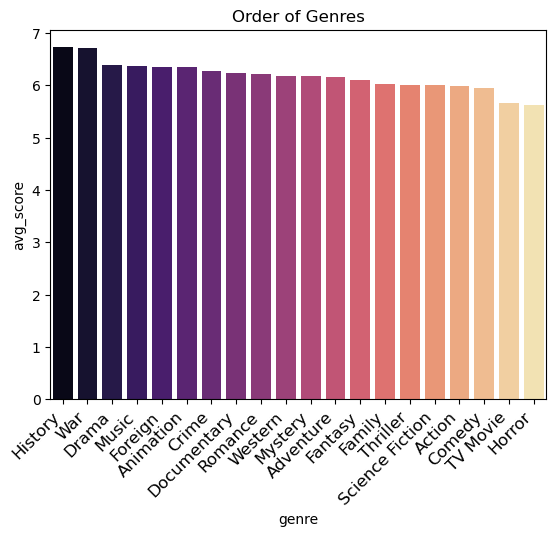

In [231]:
sns.barplot(x=df_avg_score['genre'],
            y=df_avg_score['avg_score'],
            palette = 'magma',
            order = df_avg_score.sort_values('avg_score',ascending=False).genre)


plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='large'
           )

plt.title('Order of Genres')

plt.show()

> ### Conclusion:
>
>
> This barchart shows the average score over all films with a given genre in its list of genres. *History* comes out on top but there is little variation in this graph due to the genres reoccuring in the genre lists thoughout most movies.

# **4.** Single Observation Analyses

## **4.1** 